In [10]:
#!pip install matplotlib
#!pip install pandas
#!pip install squarify
#!pip install numpy

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   ---------- ----------------------------- 2.1/7.8 MB 12.9 MB/s eta 0:00:01
   ---------------------------------- ----- 6.8/7.8 MB 19.2 MB/s eta 0:00:01
   ---------------------------------------- 7.8/7.8 MB 17.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---------------------------------------- 2.2/2.2 MB 20.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
   ------------------------------------ --- 2.4/2.6 MB 18.5 MB/s eta 0:00:01
   ---------------------------------------- 2.6/2.6 MB 9.8 MB/s eta 0:00:00
Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/11.5 MB ? eta -:--:--
   -- ------------------------------------- 0.8/11.5 MB 7.9 MB/s eta 0:00:02
   -------------- -----------

In [7]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

import pandas as pd
import squarify

In [8]:
plt.style.use('fivethirtyeight')

d2coding_path = 'Desktop/Download/D2Coding-Ver1.3.2-20180524/D2Coding/D2Coding-Ver1.3.2-20180524.ttf' # 폰트 경로
fm.fontManager.addfont(d2coding_path)
plt.rcParams['font.family'] = 'D2Coding'

matplotlib.rcParams['axes.unicode_minus'] = False

In [9]:
file_path = 'Desktop\전국교통사고다발지역표준데이터.csv'
data_ori = pd.read_csv(file_path, encoding='EUC-KR')
data_ori.head()
data_pick = data_ori[['사고연도','사고유형구분','사고다발지역시도시군구','사고지역위치명','사고건수','위도','경도','사고다발지역폴리곤정보']]
data_pick.tail()

,사고연도,사고유형구분,사고다발지역시도시군구,사고지역위치명,사고건수,위도,경도,사고다발지역폴리곤정보
14473,2014,자전거,서울특별시 송파구10,서울특별시 송파구 거여동(마천사거리 부근),8,37.497152,127.146265,"{type:Polygon,coordinates:[[[127.1478646,37.49..."
14474,2014,자전거,서울특별시 송파구11,서울특별시 송파구 신천동(잠실역_일반국도3호선_진입_1 부근),7,37.514094,127.099354,"{type:Polygon,coordinates:[[[127.1009533,37.51..."
14475,2014,자전거,서울특별시 송파구12,서울특별시 송파구 삼전동(신양빌라 부근),7,37.501233,127.085015,"{type:Polygon,coordinates:[[[127.0866148,37.50..."
14476,2014,자전거,서울특별시 송파구13,서울특별시 송파구 가락동(문정시영아파트 부근),7,37.492374,127.136029,"{type:Polygon,coordinates:[[[127.1376285,37.49..."
14477,2014,자전거,서울특별시 송파구14,서울특별시 송파구 풍납동(천호사거리 부근),6,37.538616,127.123464,"{type:Polygon,coordinates:[[[127.1250644,37.53..."


In [10]:
data_pick.columns =['year','type','region1','region2','total','lat','lon','info']
data_pick = data_pick.copy()
data_pick['region1'] = data_pick['region1'].str.replace(r'\d+','',regex=True)
data_pick.tail(20)

,year,type,region1,region2,total,lat,lon,info
14458,2014,자전거,서울특별시 강남구,서울특별시 강남구 압구정동(서초구-강남구경계(5) 부근),6,37.524358,127.015378,"{type:Polygon,coordinates:[[[127.0169778,37.52..."
14459,2014,자전거,서울특별시 강남구,서울특별시 강남구 일원동(대청공원앞 부근),6,37.492323,127.083538,"{type:Polygon,coordinates:[[[127.0851367,37.49..."
14460,2014,자전거,서울특별시 강남구,서울특별시 강남구 역삼동(광진빌딩 부근),5,37.497138,127.045338,"{type:Polygon,coordinates:[[[127.0469368,37.49..."
14461,2014,자전거,서울특별시 강남구,서울특별시 강남구 개포동(동진빌딩 부근),5,37.478874,127.049105,"{type:Polygon,coordinates:[[[127.0507036,37.48..."
14462,2014,자전거,서울특별시 강남구,서울특별시 강남구 대치동(청실종합상가 부근),4,37.492384,127.058243,"{type:Polygon,coordinates:[[[127.0598422,37.49..."
14463,2014,자전거,서울특별시 강남구,서울특별시 강남구 도곡동(롯데백화점앞 부근),4,37.496716,127.054352,"{type:Polygon,coordinates:[[[127.0559513,37.49..."
14464,2014,자전거,서울특별시 송파구,서울특별시 송파구 잠실동(올림픽대로-백제고분로램프(3) 부근),16,37.518233,127.081505,"{type:Polygon,coordinates:[[[127.0831043,37.51..."
14465,2014,자전거,서울특별시 송파구,서울특별시 송파구 석촌동(배명로터리 부근),10,37.502317,127.096595,"{type:Polygon,coordinates:[[[127.0981948,37.50..."
14466,2014,자전거,서울특별시 송파구,서울특별시 송파구 가락동(제일오피스텔 부근),10,37.493047,127.117271,"{type:Polygon,coordinates:[[[127.1188702,37.49..."
14467,2014,자전거,서울특별시 송파구,서울특별시 송파구 방이동(올림픽공원_남부순환로_진출_2 부근),10,37.513135,127.128650,"{type:Polygon,coordinates:[[[127.1302499,37.51..."


In [11]:
data_type = data_pick.groupby('type')['total'].sum().reset_index(name='count')
data_type = data_type.sort_values('count', ascending=False)
data_type

,type,count
4,자전거,24939
1,보행노인,23165
0,무단횡단,14805
2,보행어린이,3802
3,스쿨존어린이,989


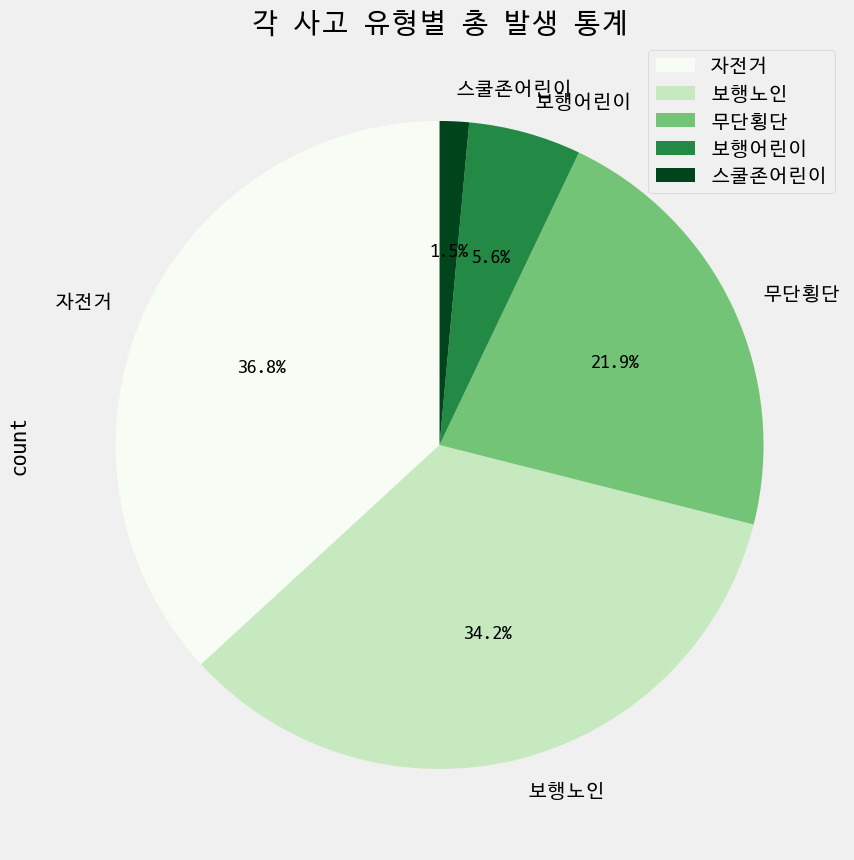

In [12]:
data_type.plot(
    kind='pie', # 파이 차트를 그리기 위한 유형 설정
    y='count', # 각 조각의 크기를 나타내는 데이터 열
    labels=data_type['type'], # 각 조각에 대한 라벨 설정
    figsize=(10,10), # 그래프의 크기 설정 (10x10 인치)
    startangle = 90, # 차트 시작 각도 설정 (90도)
    autopct = '%2.1f%%', # 각 조각의 퍼센티지 포맷 설정
    title = "각 사고 유형별 총 발생 통계", # 그래프 제목 설정
    cmap = matplotlib.cm.Greens # 색상맵 설정 (Greens 컬러맵 사용)
)
plt.savefig('./plot.png') # 이미지 저장

In [13]:
from IPython.display import display, HTML
html = f"""
<div style="display:flex;">
    <div style="flex:1; padding:10px;">
    <h3>Data Table</h3>
    {data_type.to_html(index=False)}
    </div>
<div style ="flex:3; padding 10px;">
<h3>Pie Chart</h3>
<img src="plot.png" alt="PieChart">
</div>
</div> """
display(HTML(html))

type,count
자전거,24939
보행노인,23165
무단횡단,14805
보행어린이,3802
스쿨존어린이,989


In [14]:
data_pick2=data_pick.copy()
data_fix = data_pick2[data_pick2['type']=='스쿨존어린이']
data_fix.head()

,year,type,region1,region2,total,lat,lon,info
320,2023,스쿨존어린이,강원특별자치도 원주시,강원특별자치도 원주시 관설동(단관초교 부근),2,37.317551,127.963575,"{type:Polygon,coordinates:[[[127.96626952,37.3..."
321,2023,스쿨존어린이,전북특별자치도 전주시 완산구,전북특별자치도 전주시 완산구 효자동2가(전주효천초교 부근),2,35.800046,127.103436,"{type:Polygon,coordinates:[[[127.1061306,35.80..."
322,2023,스쿨존어린이,전북특별자치도 정읍시,전북특별자치도 정읍시 상동(한솔초교 부근),2,35.561239,126.872186,"{type:Polygon,coordinates:[[[126.87488118,35.5..."
560,2012,스쿨존어린이,경상남도 거제시,경상남도 거제시 일운면(마전초교 부근),2,34.859226,128.721255,"{type:Polygon,coordinates:[[[128.7235747,34.86..."
561,2012,스쿨존어린이,경상남도 거창군,경상남도 거창군 거창읍(거창초교 부근),2,35.687840,127.911100,"{type:Polygon,coordinates:[[[127.9134436,35.68..."


In [15]:
data_fix2 = data_fix.groupby('year')["total"].sum().reset_index(name='count')
data_fix2.head()

,year,count
0,2012,74
1,2013,56
2,2014,90
3,2015,88
4,2016,95


<Axes: title={'center': '연도별 스쿨존 어린이 사고 발생 통계'}, ylabel='count'>

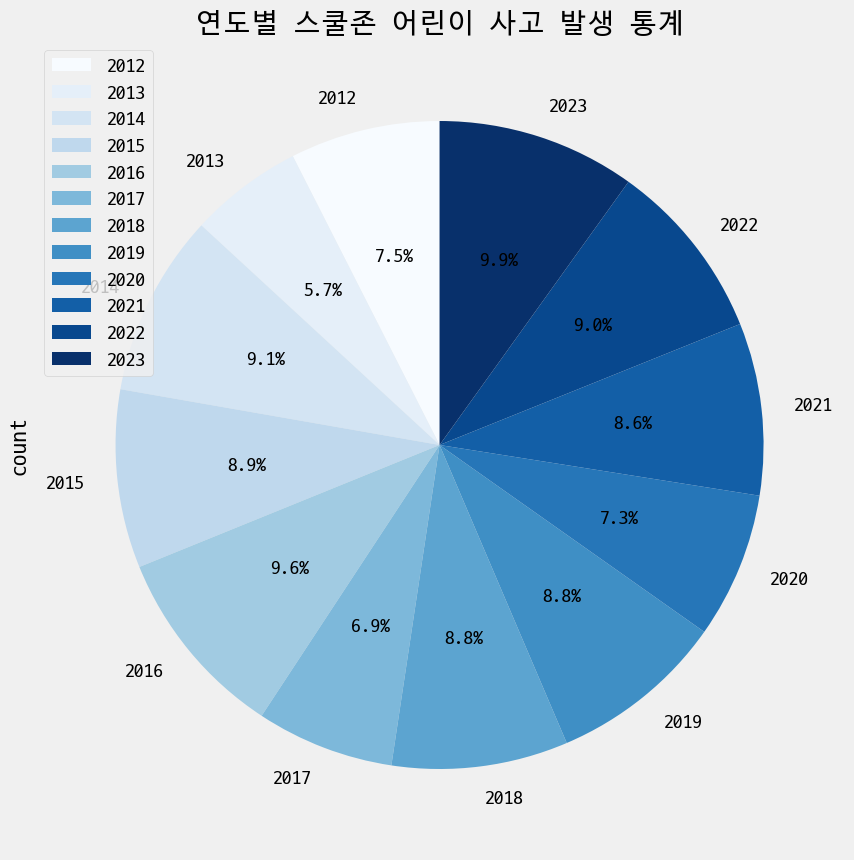

In [16]:
data_fix2.plot(
    kind = 'pie',
    y='count',
    labels=data_fix2['year'],
    figsize = (10,10),
    startangle = 90,
    autopct='%1.1f%%',
    title = "연도별 스쿨존 어린이 사고 발생 통계",
    cmap = matplotlib.cm.Blues
)

<Axes: title={'center': '연도별 보행노인 사고 발생 통계'}, ylabel='count'>

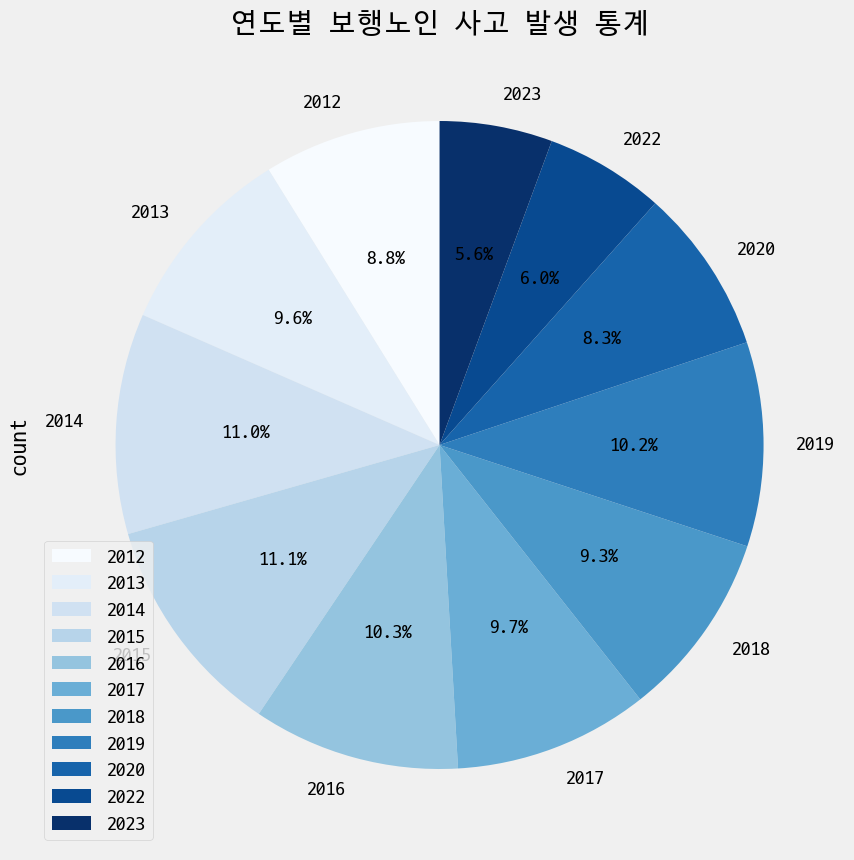

In [17]:
a = "보행노인"
data_pick3 = data_pick.copy()
data_fix3 = data_pick3[data_pick3['type']==a]
data_fix3 = data_fix3.groupby('year')["total"].sum().reset_index(name='count')
data_fix3.plot(
    kind = 'pie',
    y='count',
    labels=data_fix3['year'],
    figsize = (10,10),
    startangle = 90,
    autopct='%1.1f%%',
    title = "연도별 "+ a +" 사고 발생 통계",
    cmap = matplotlib.cm.Blues
)

In [18]:
data_pick4 = data_pick.copy()
title_array = data_type['type']
data_list = []
for i in title_array:
    data_list.append(data_pick4[data_pick4['type'] == f'{i}'])

In [20]:
data_list2 = []
for j in data_list:
    data_list2.append(j.groupby('year')["total"].sum().reset_index(name='count'))

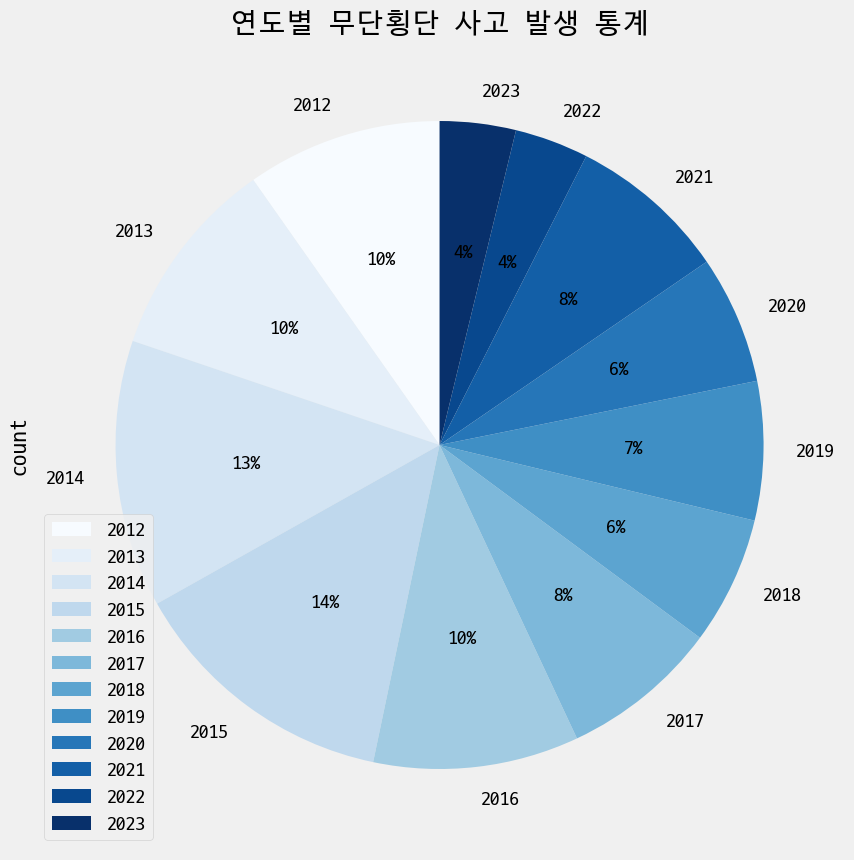

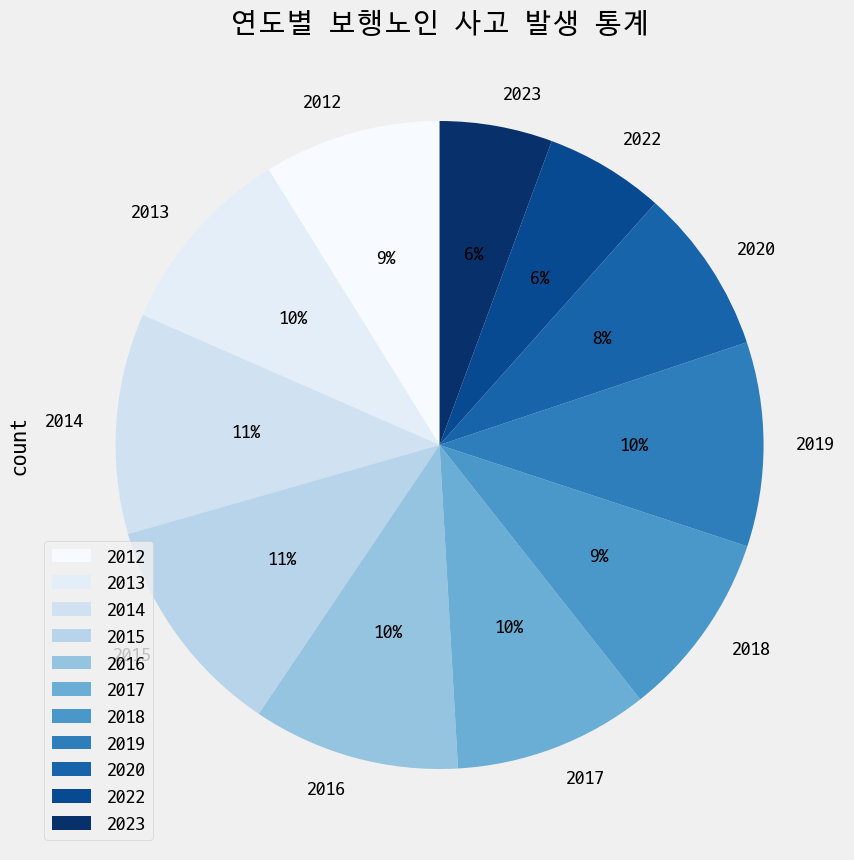

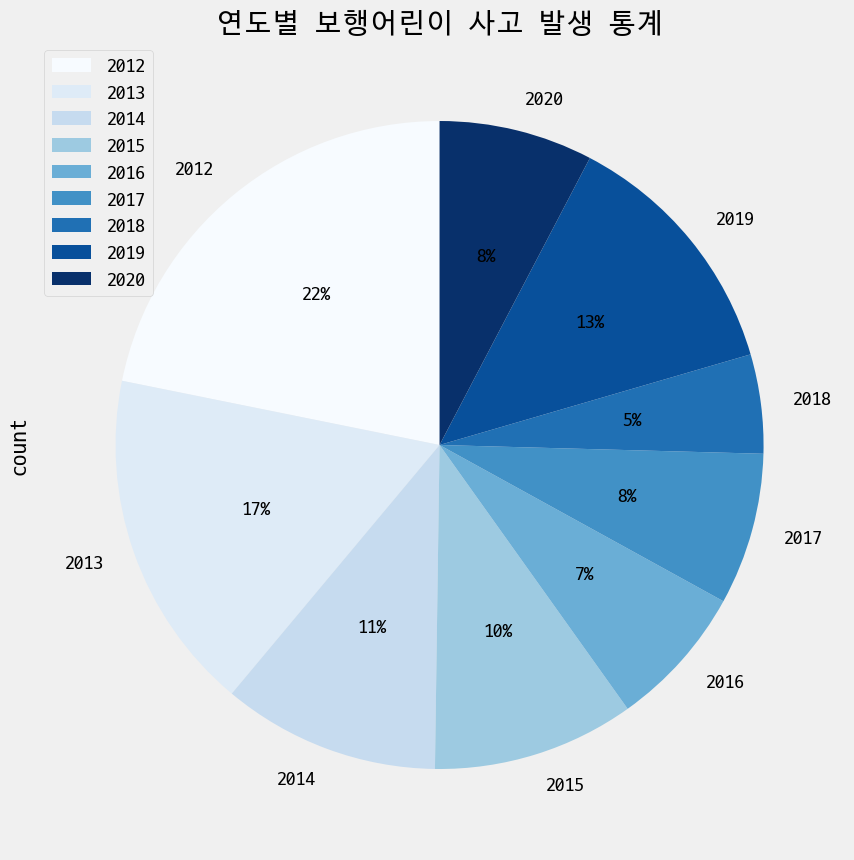

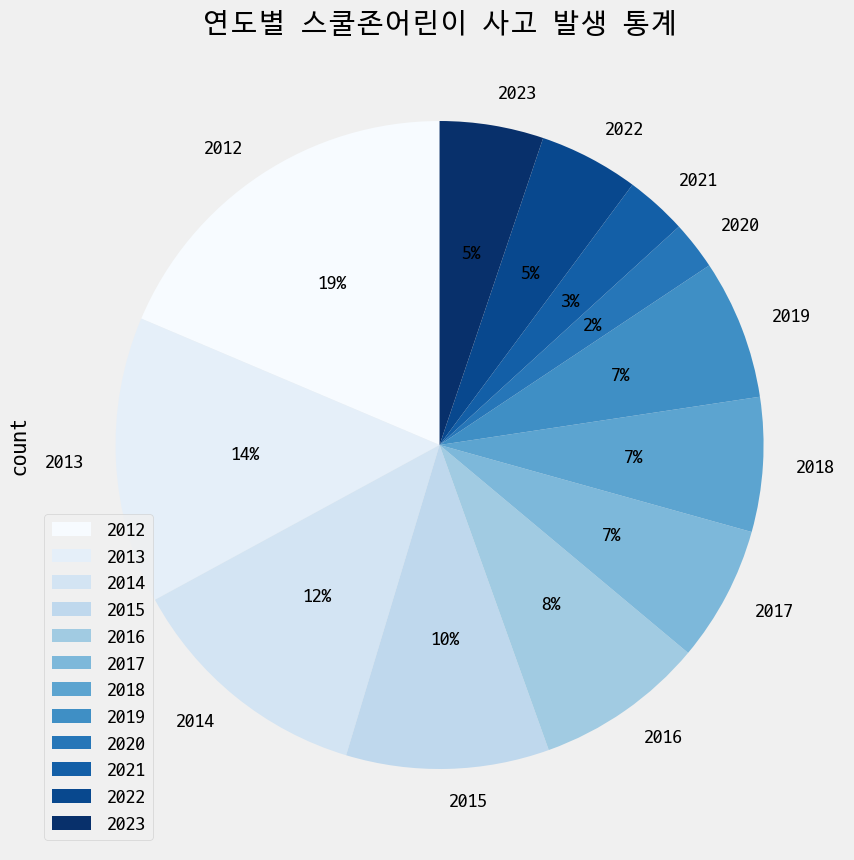

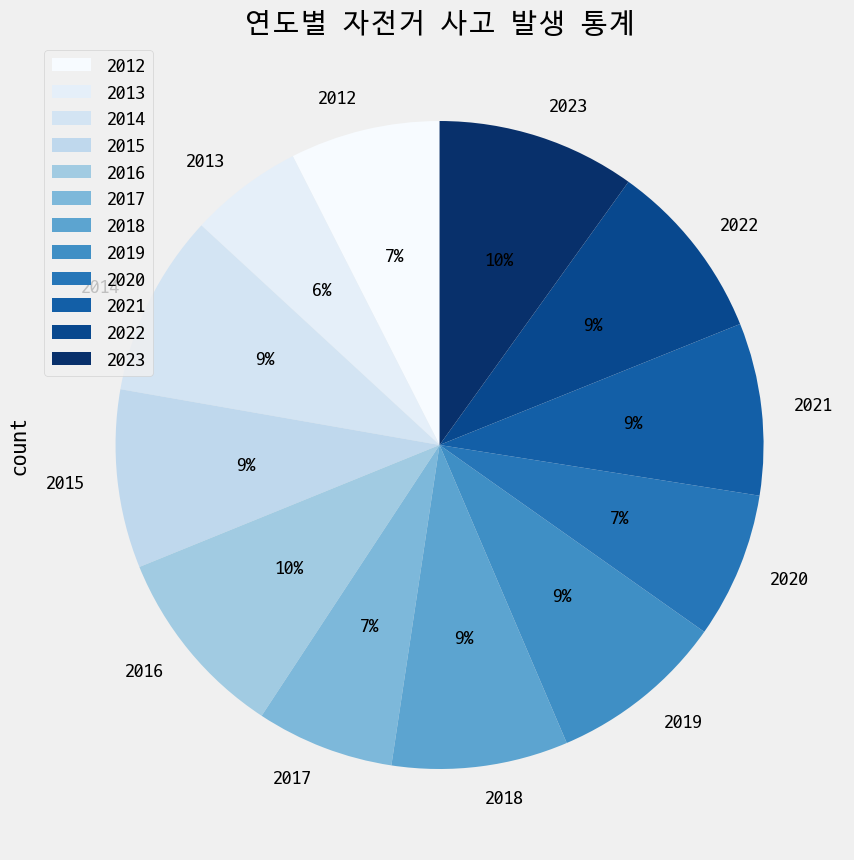

In [26]:
for k,l in enumerate(data_list2):
    l.plot(
        kind='pie',
        y='count',
        labels=l['year'],
        figsize=(10,10),
        startangle=90,
        autopct='%1.f%%',
        title = f"연도별 {title_array[k]} 사고 발생 통계",
        cmap = matplotlib.cm.Blues
    )
    plt.savefig(f'./chart{k}.png')